In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

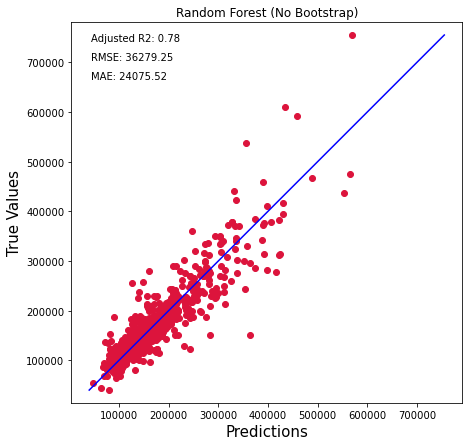

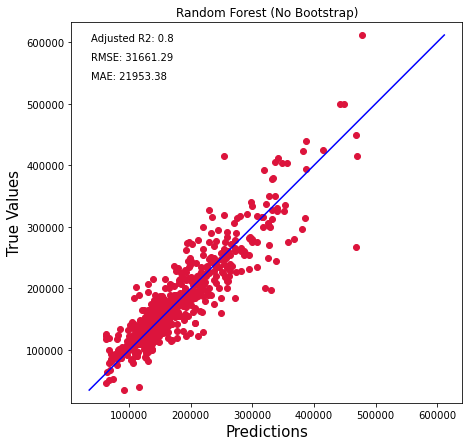

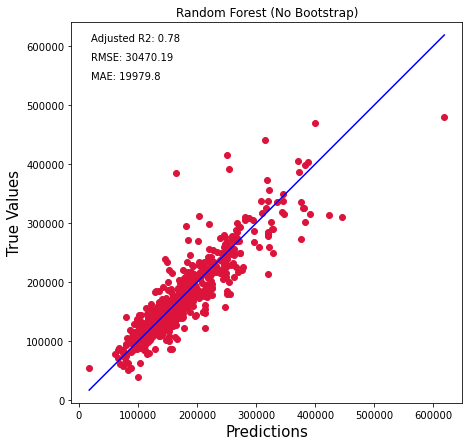

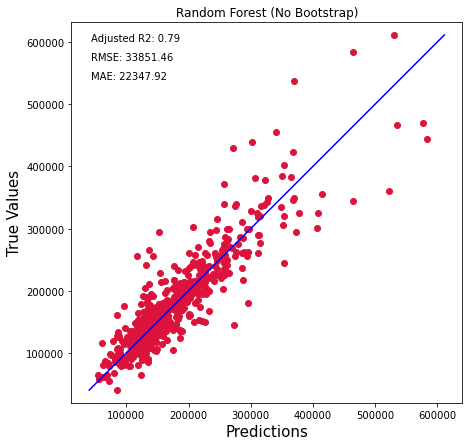

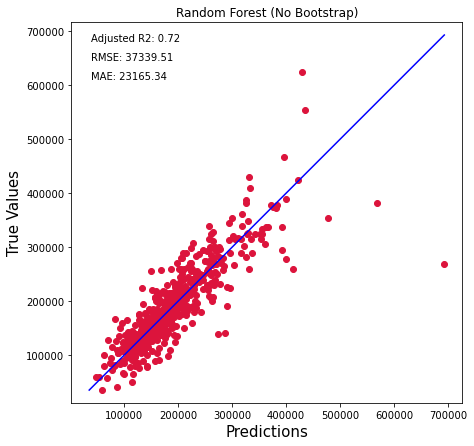

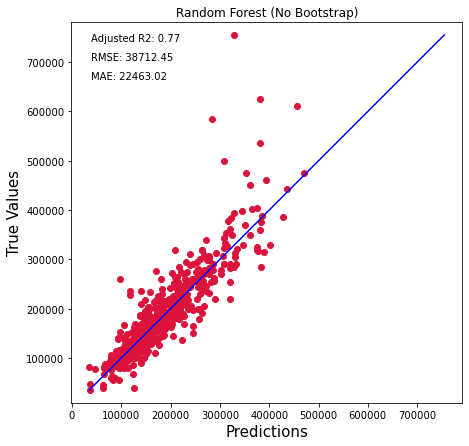

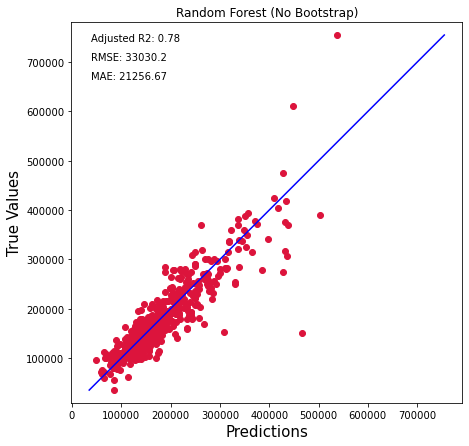

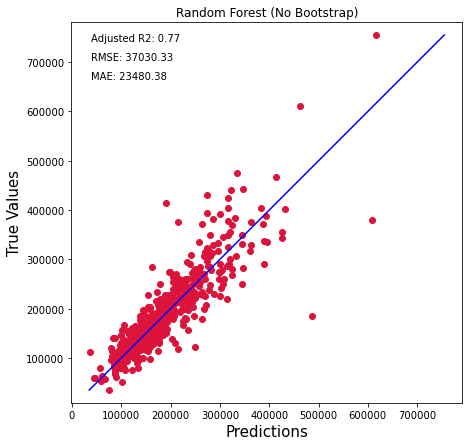

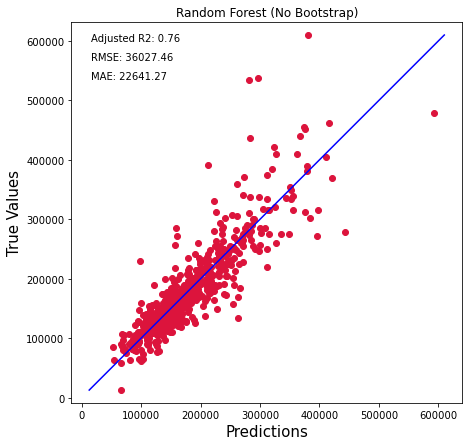

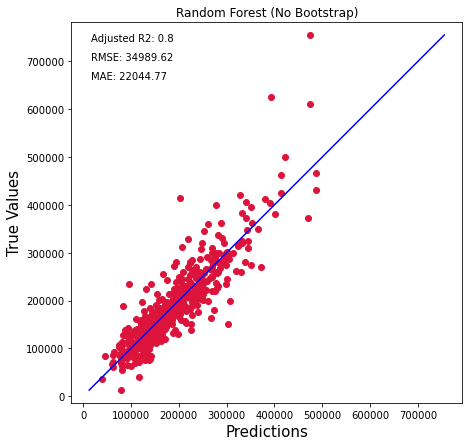

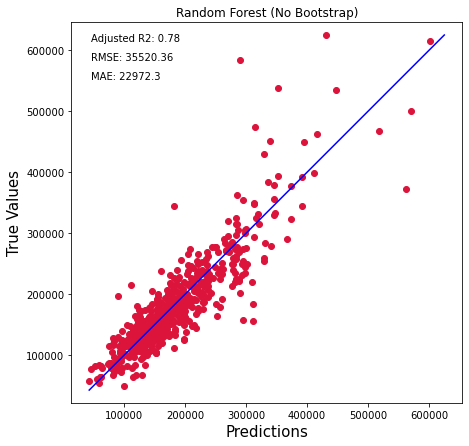

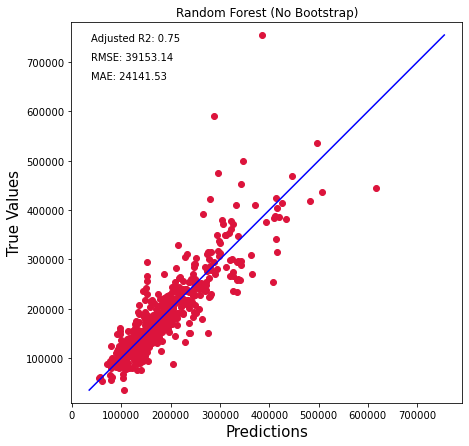

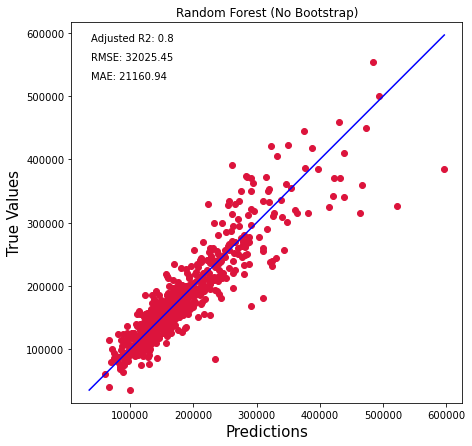

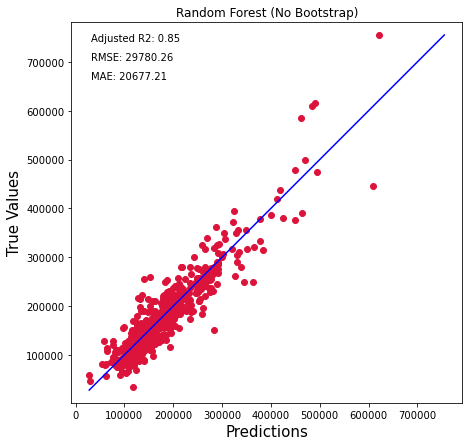

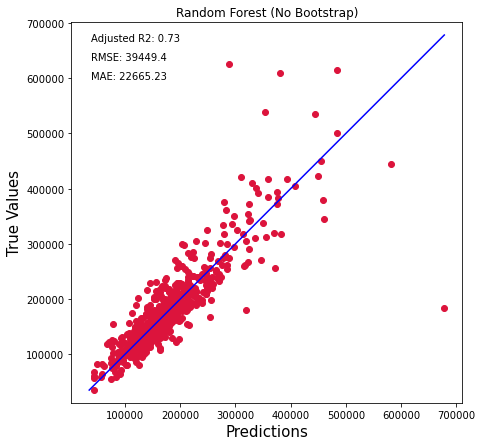

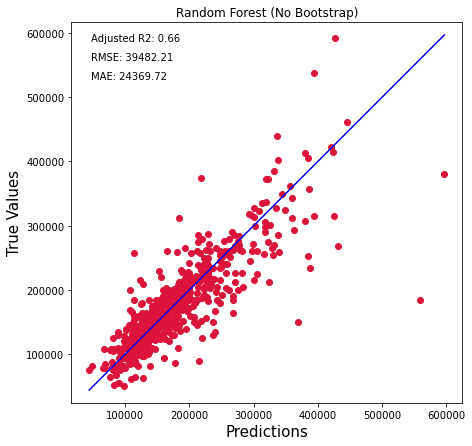

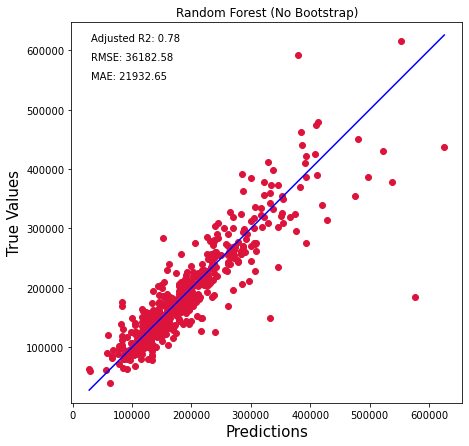

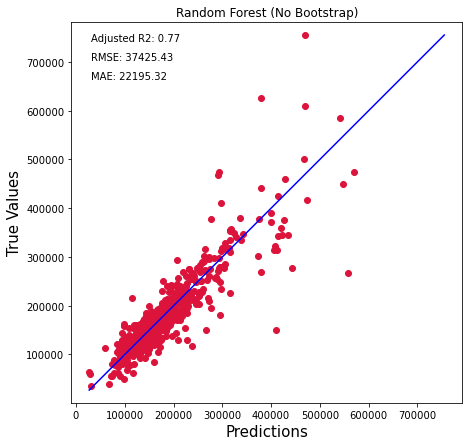

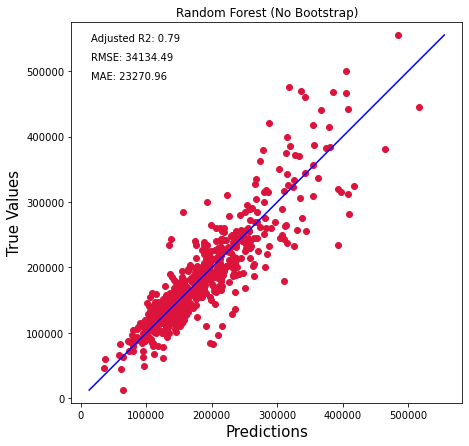

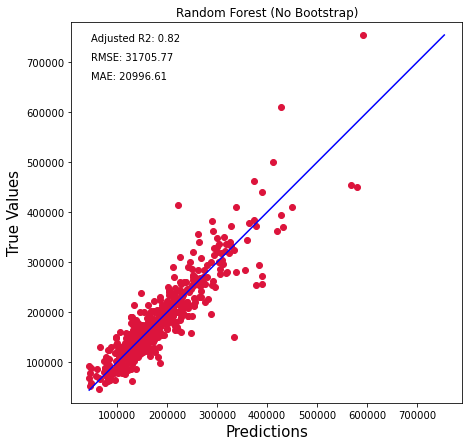

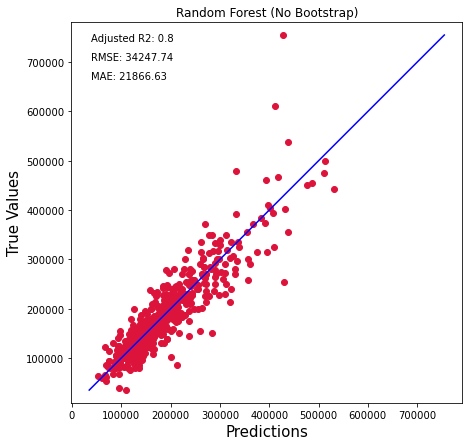

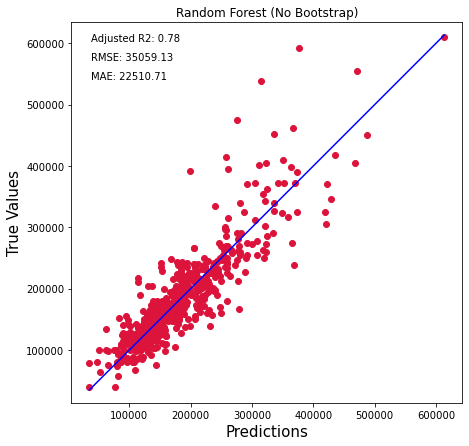

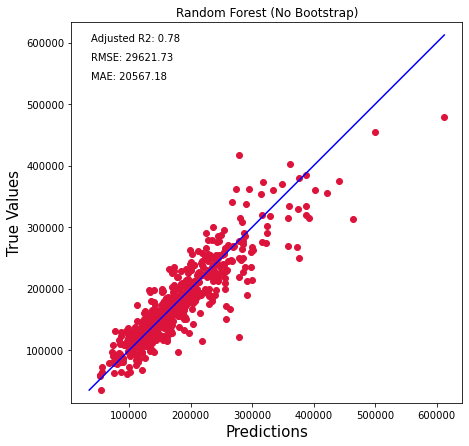

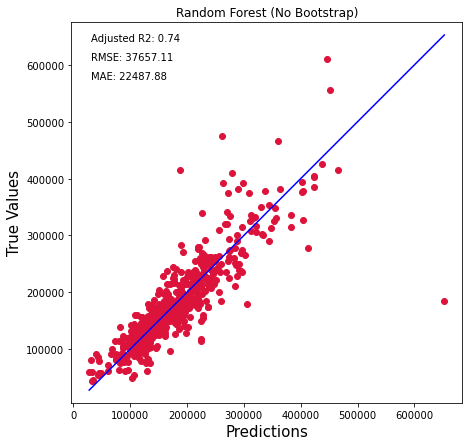

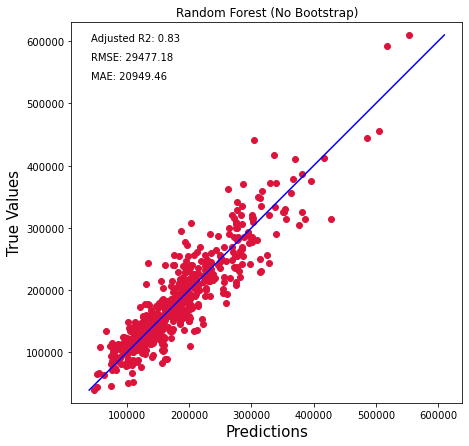

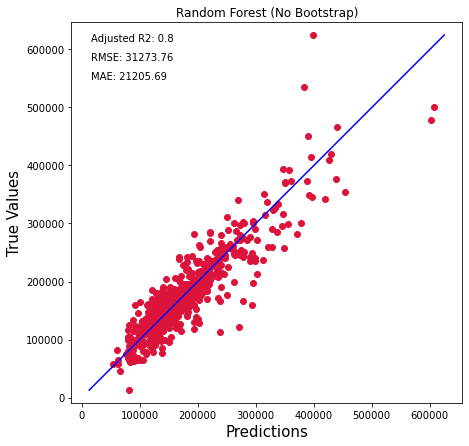

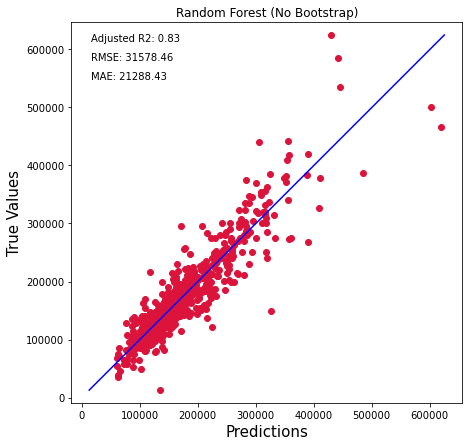

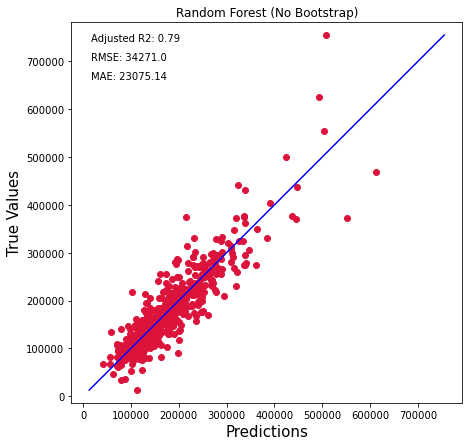

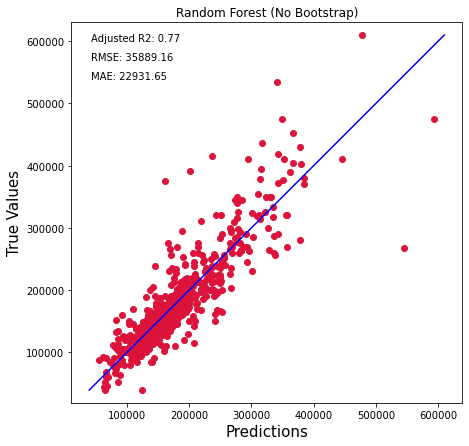

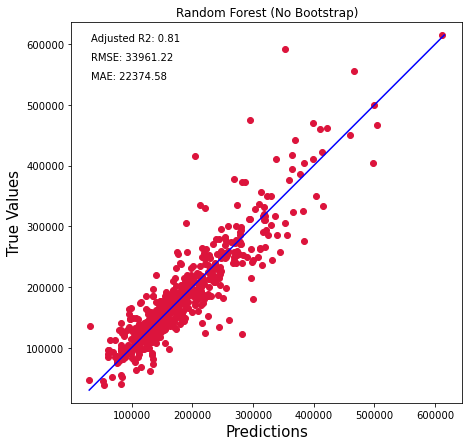

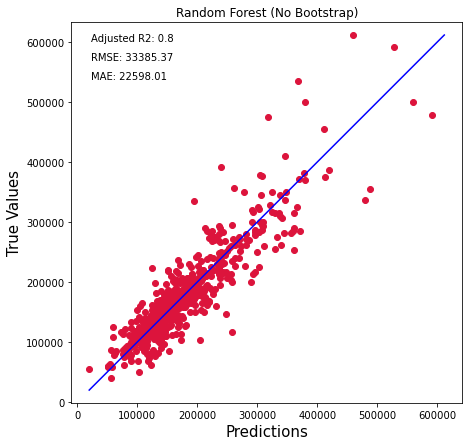

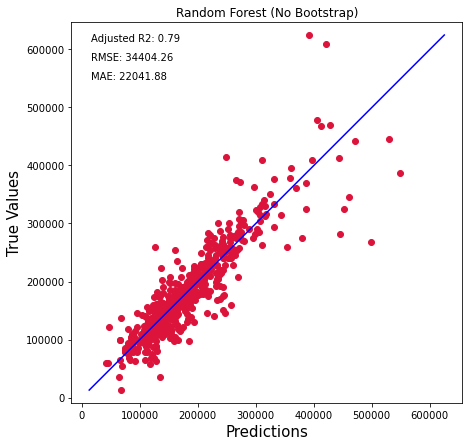

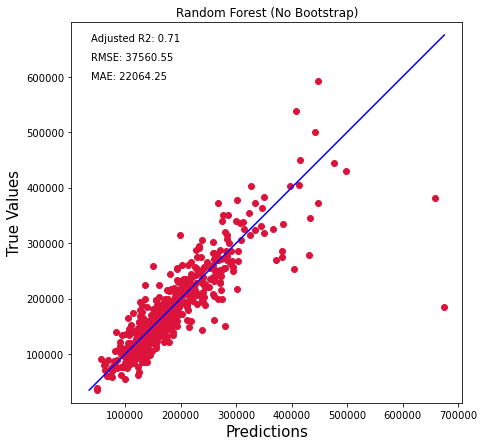

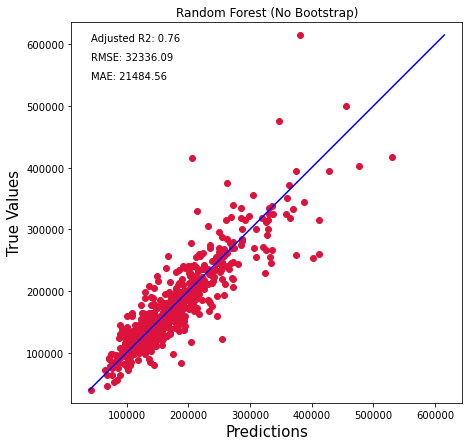

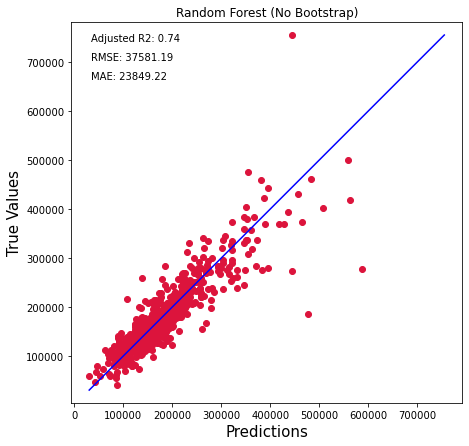

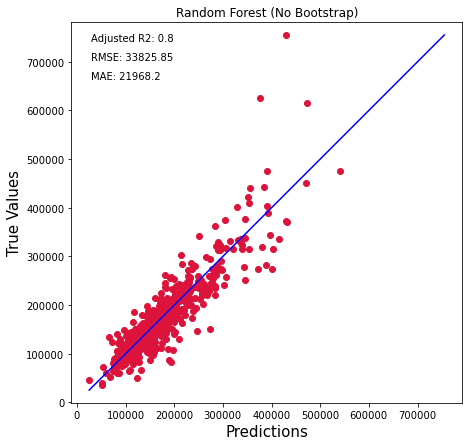

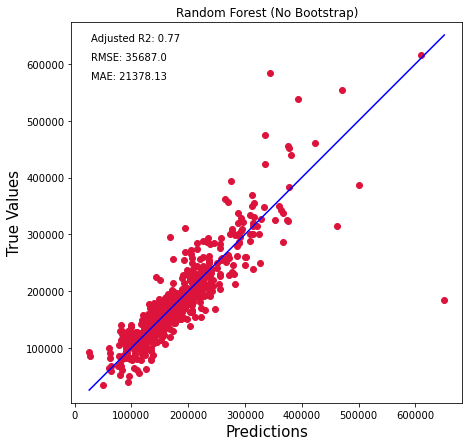

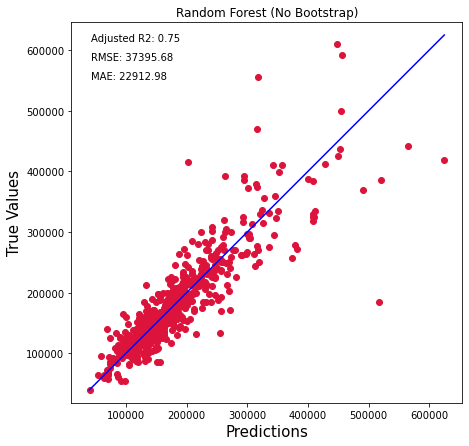

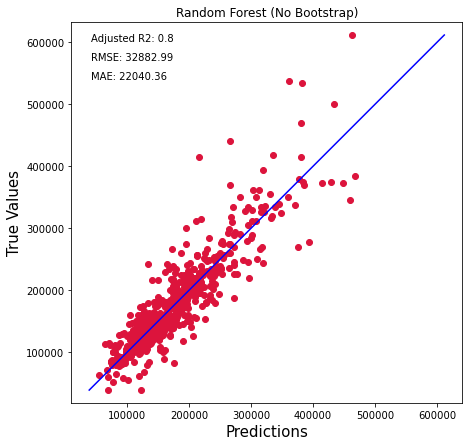

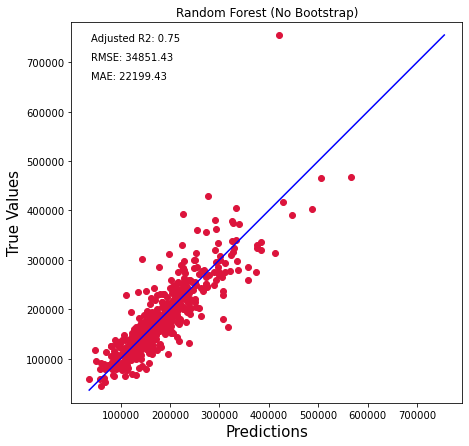

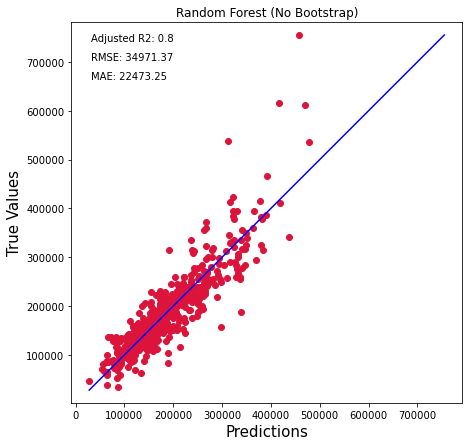

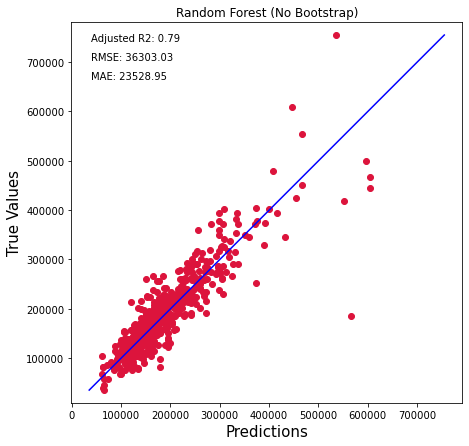

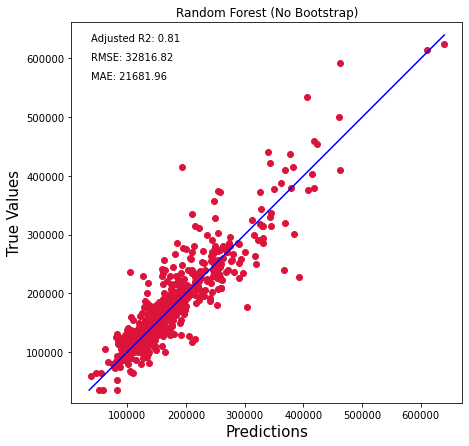

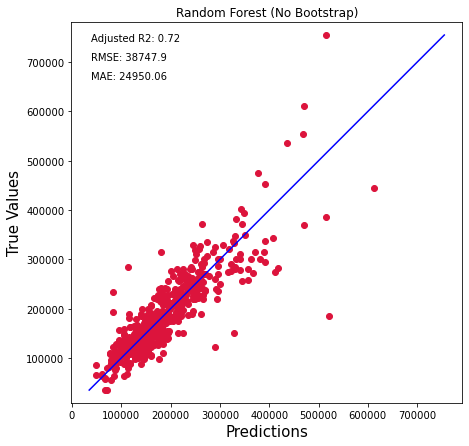

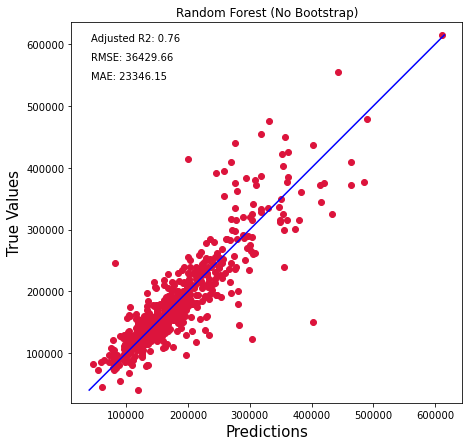

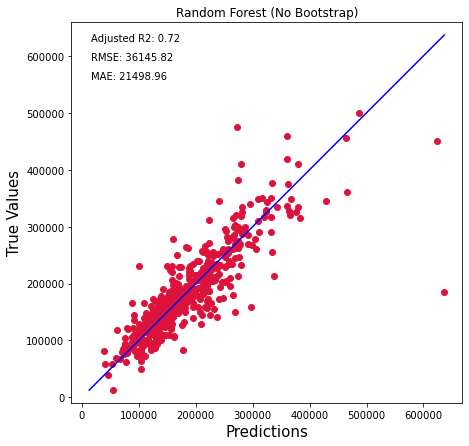

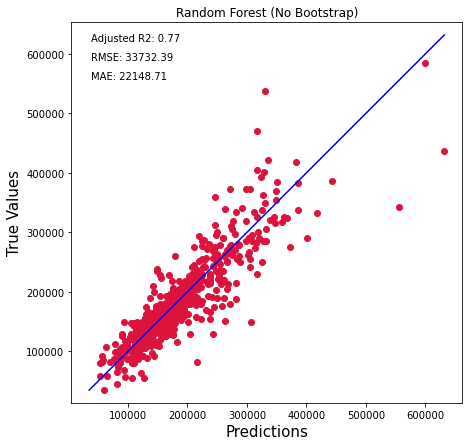

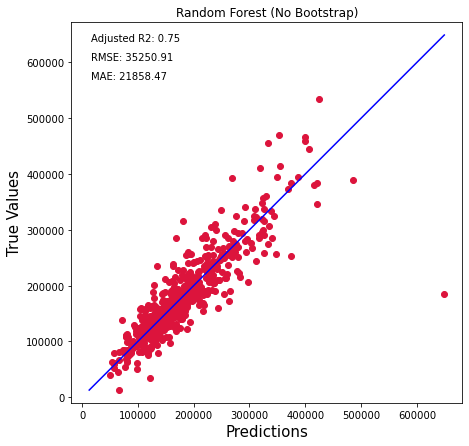

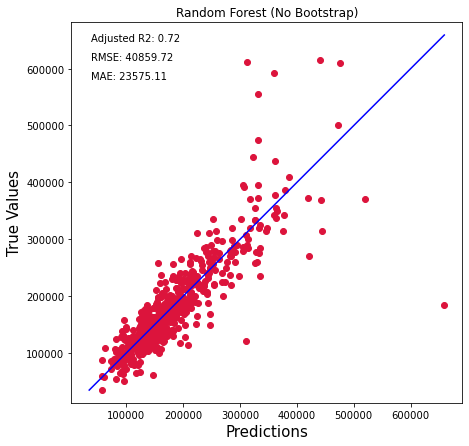

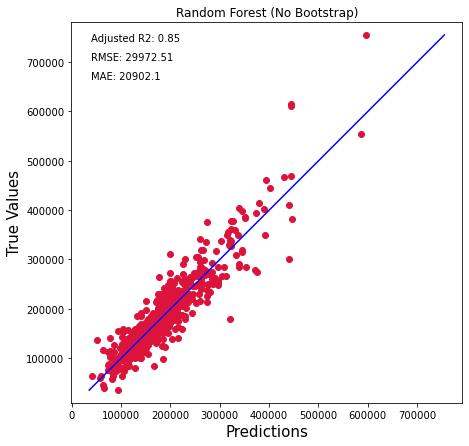

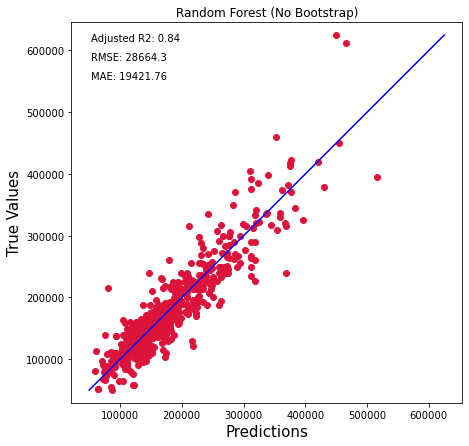

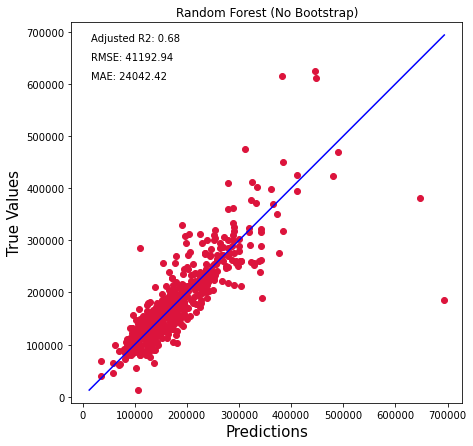

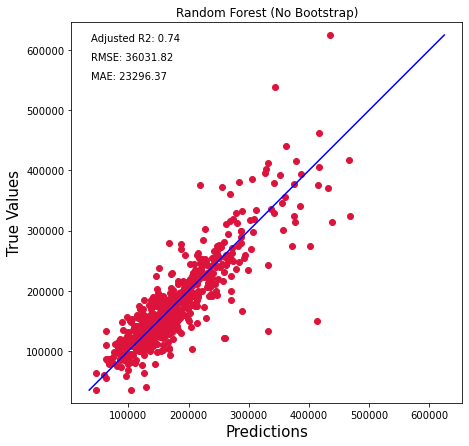

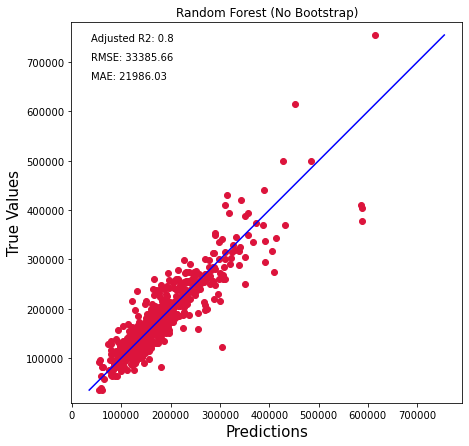

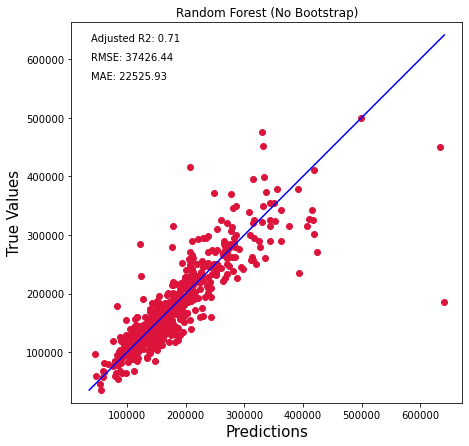

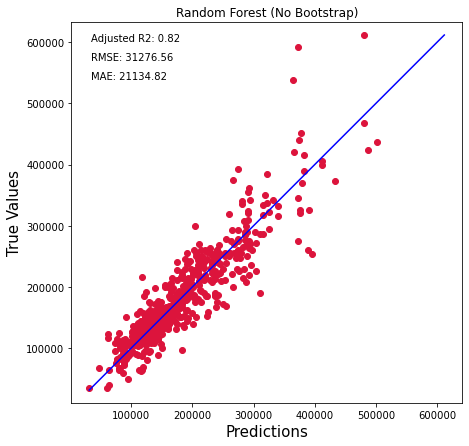

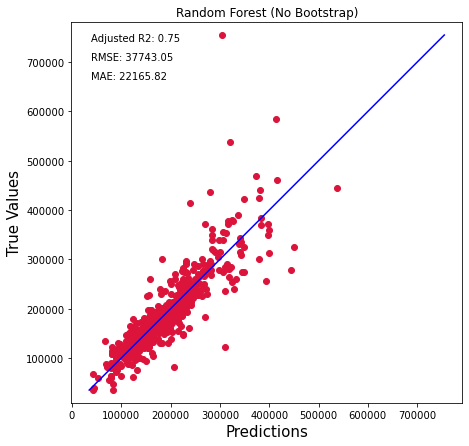

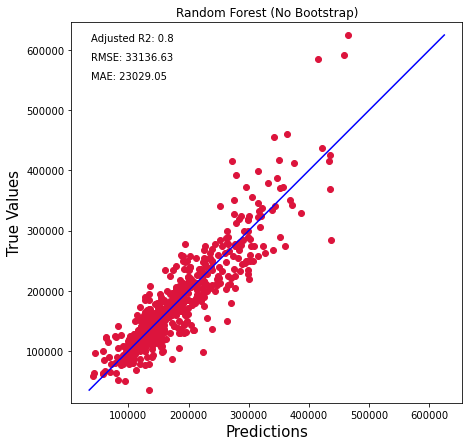

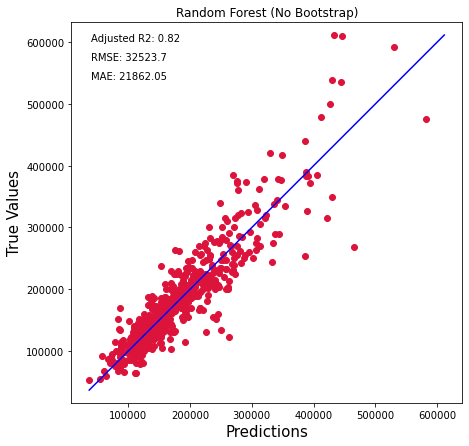

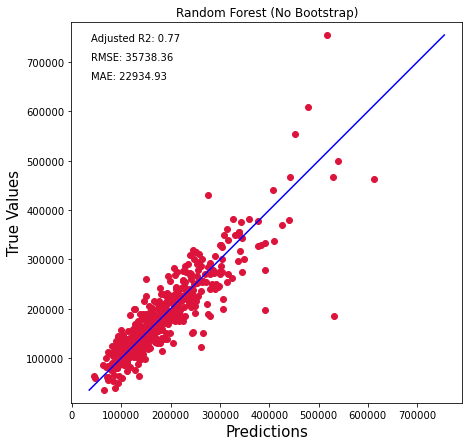

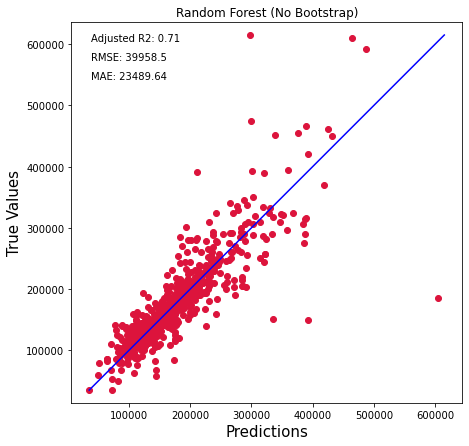

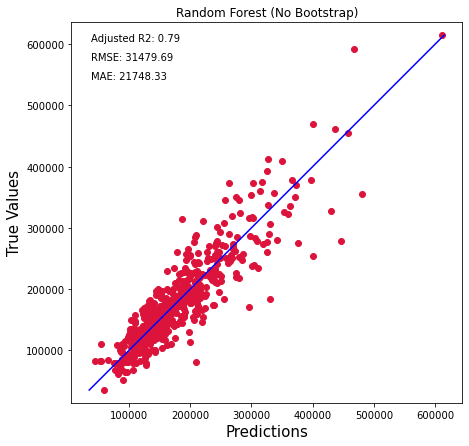

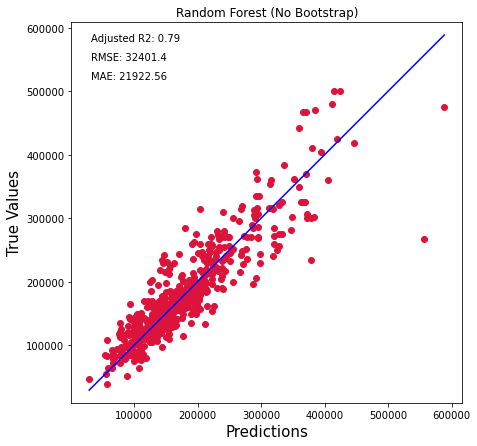

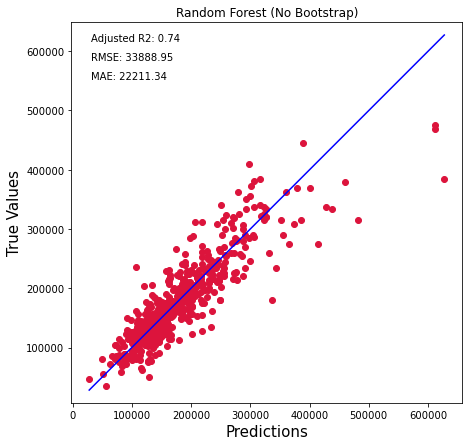

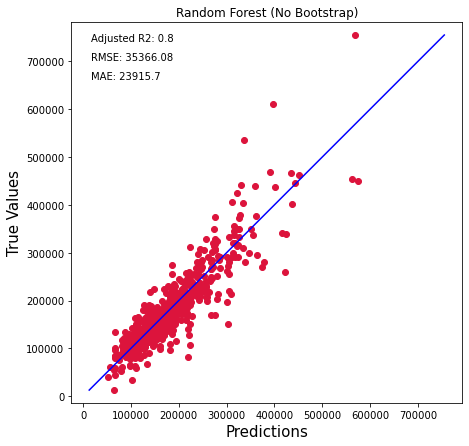

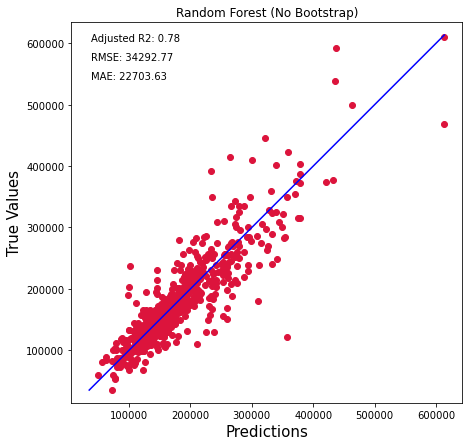

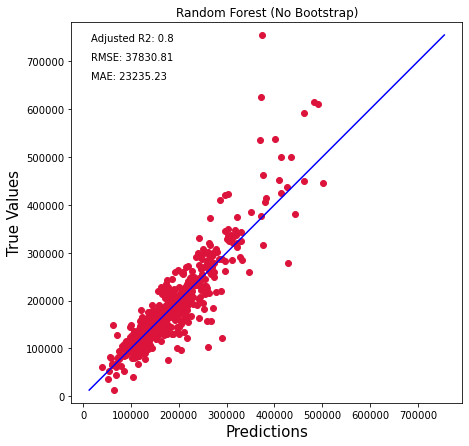

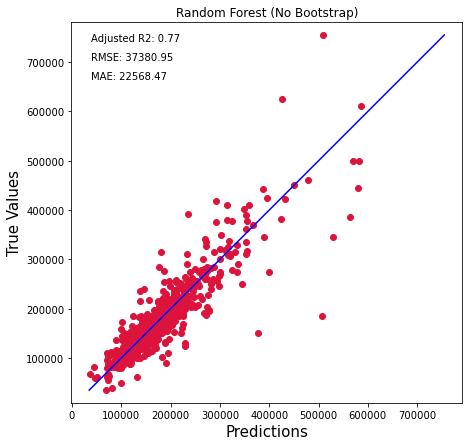

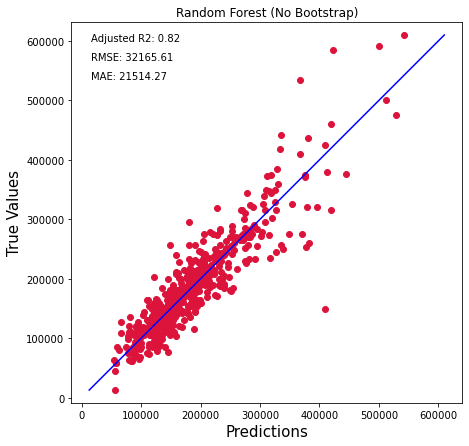

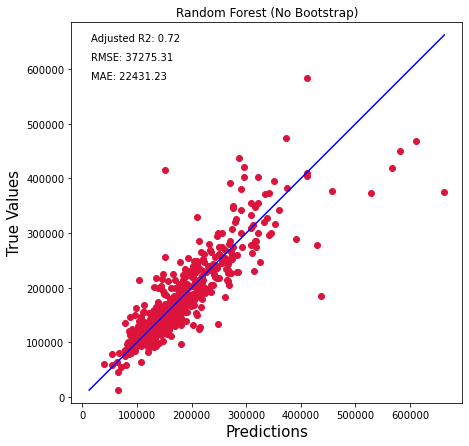

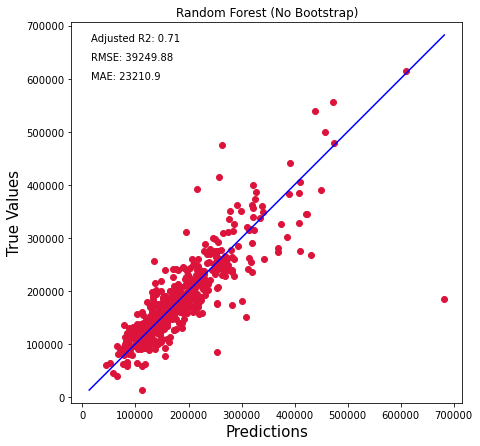

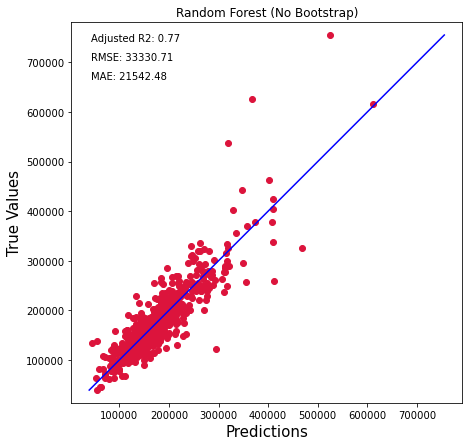

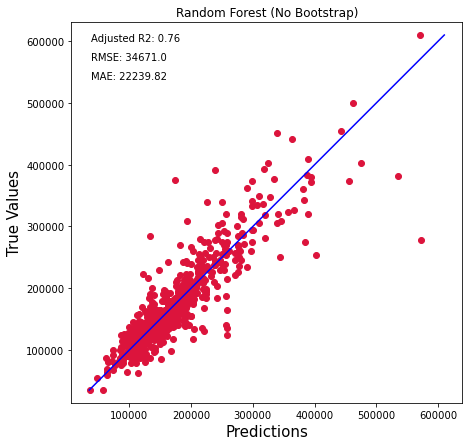

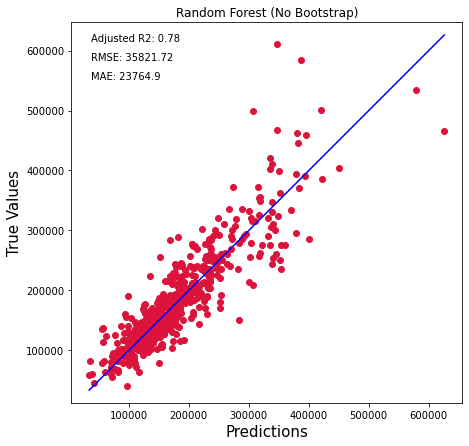

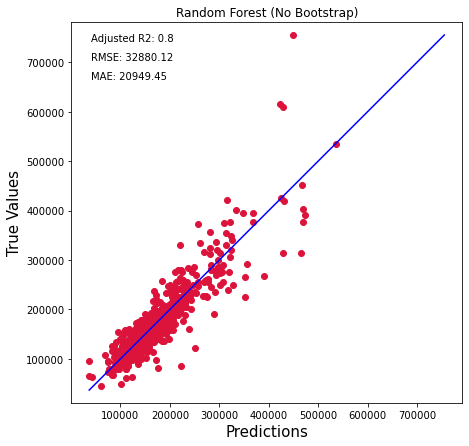

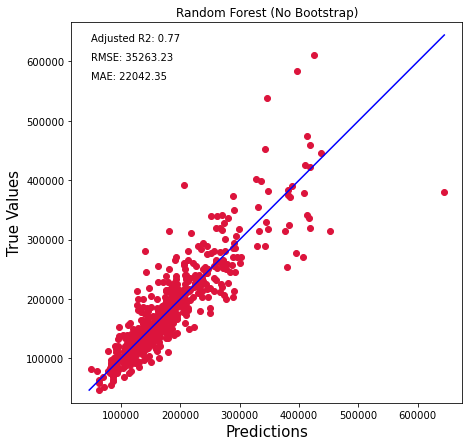

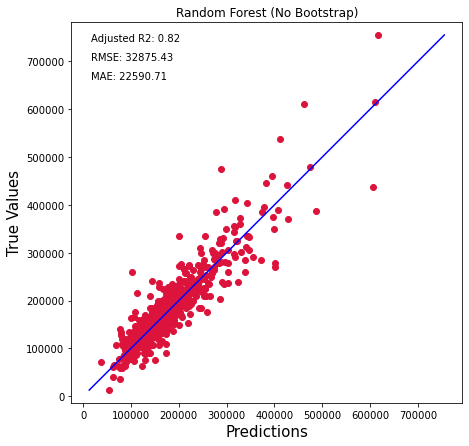

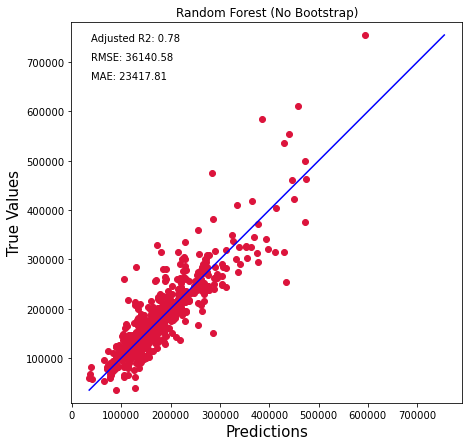

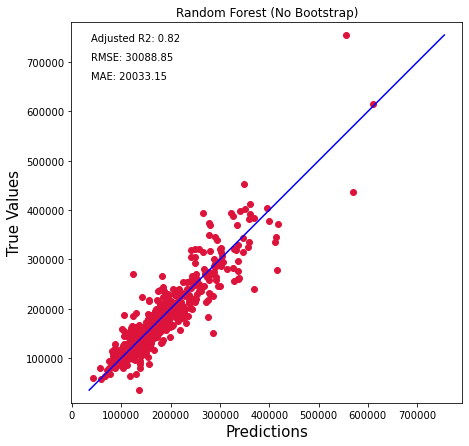

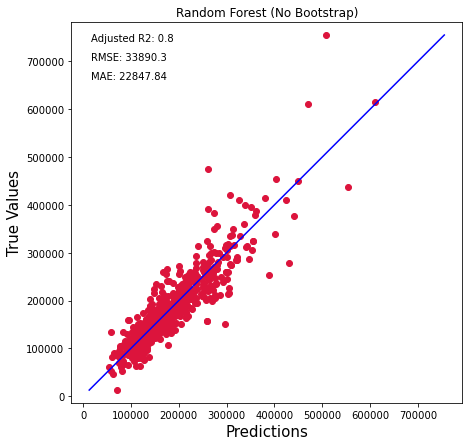

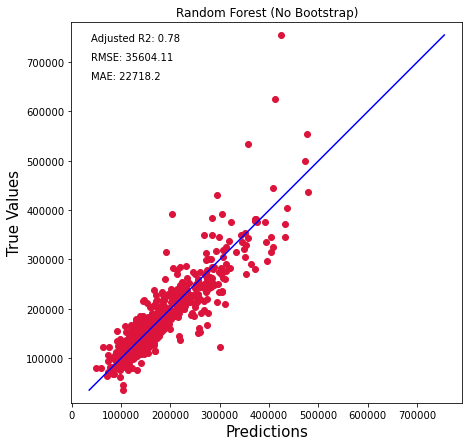

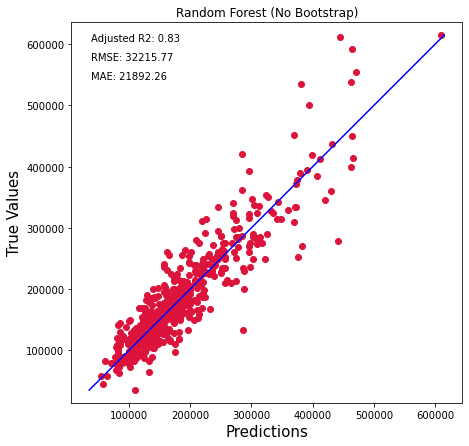

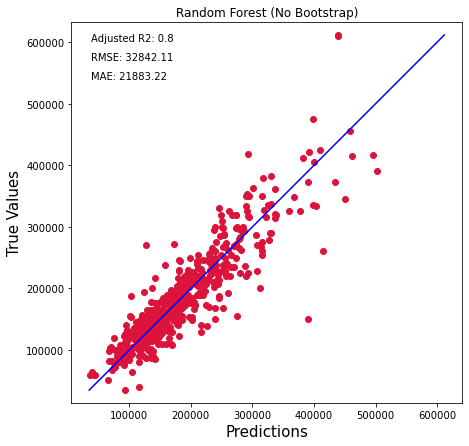

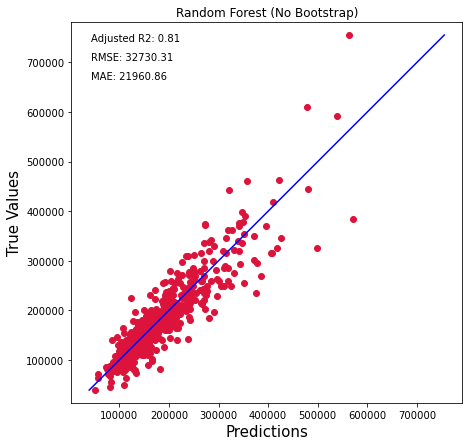

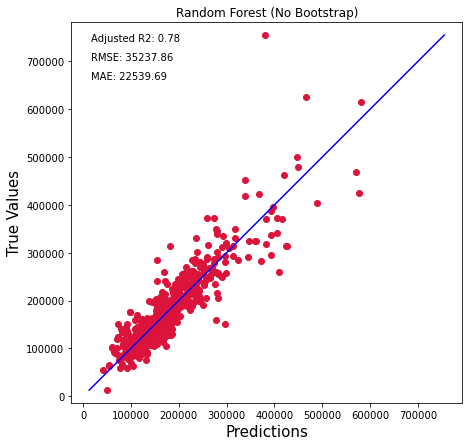

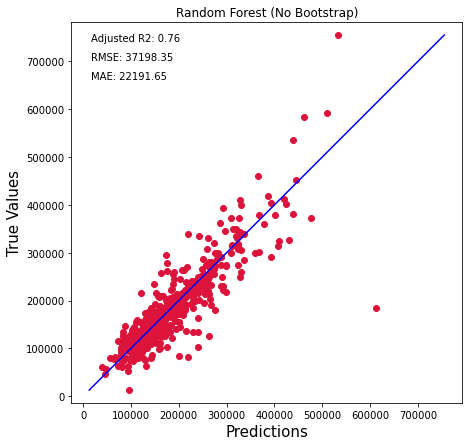

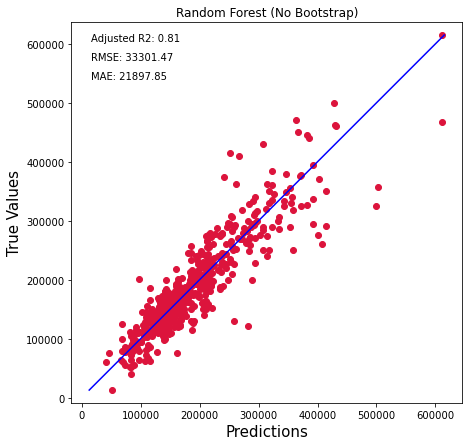

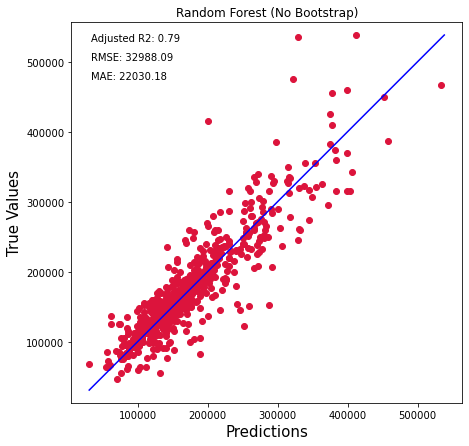

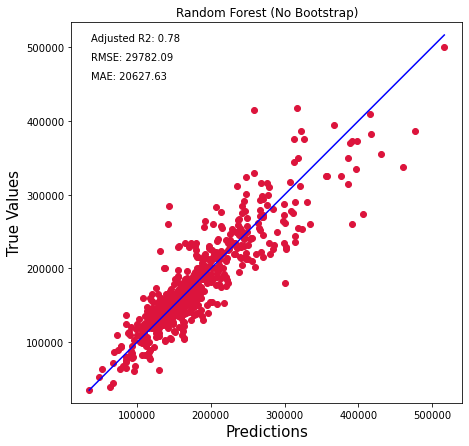

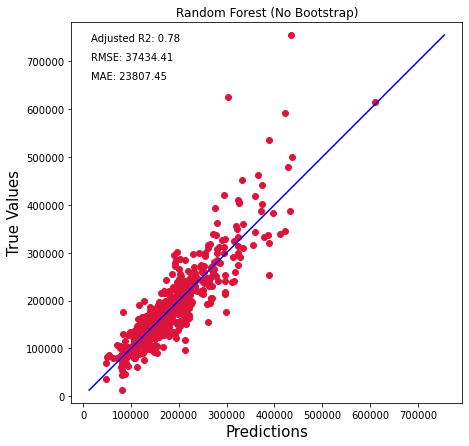

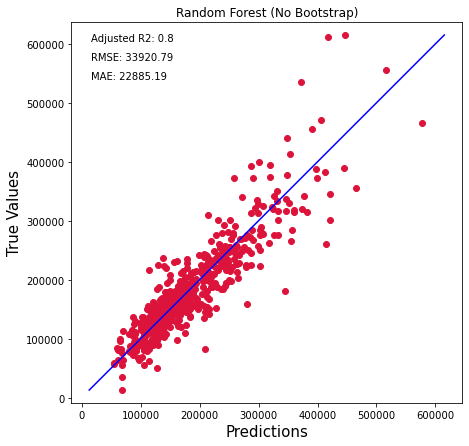

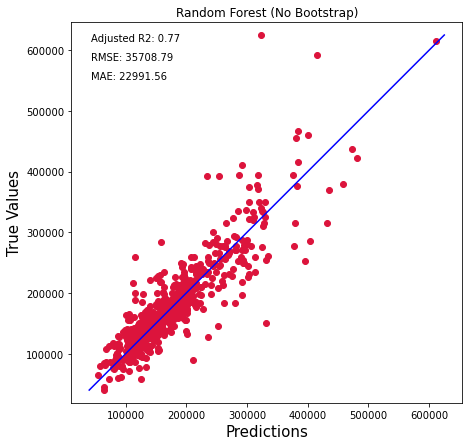

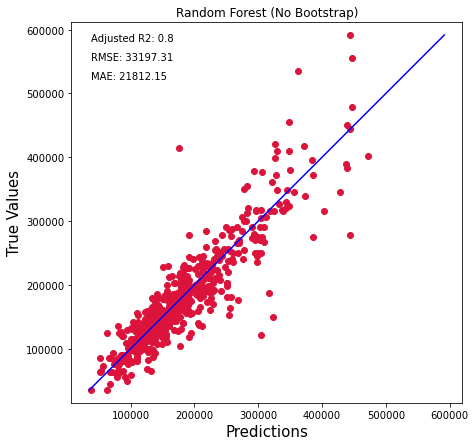

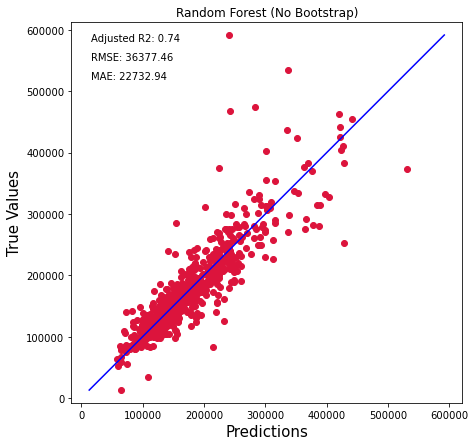

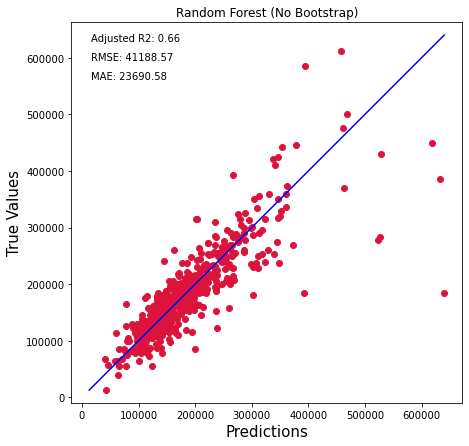

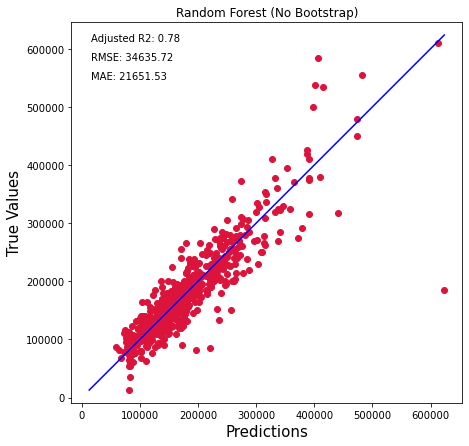

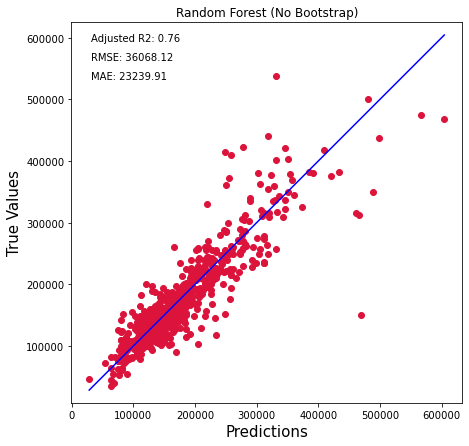

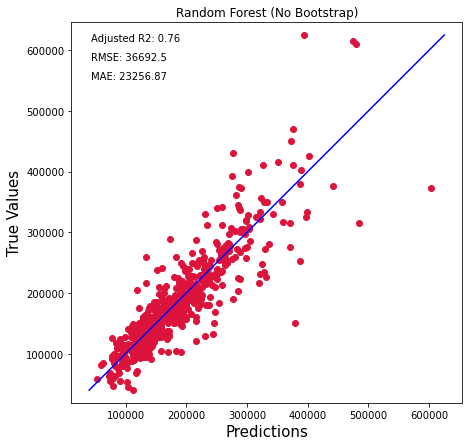

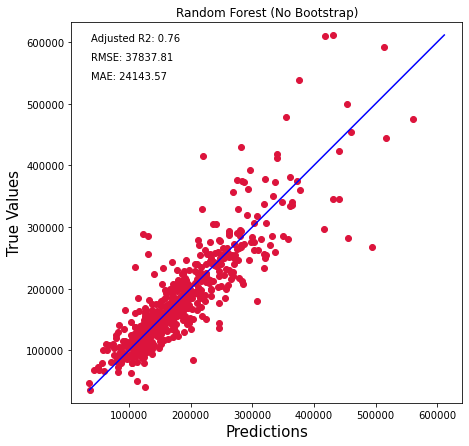

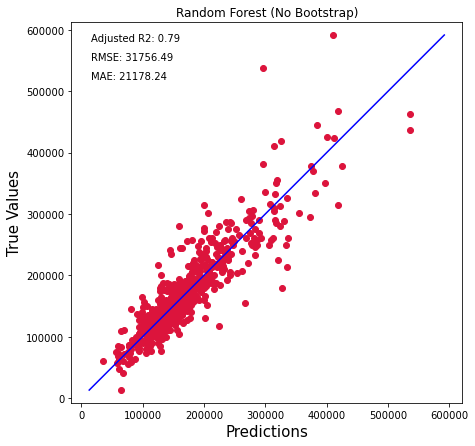

In [7]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    RF_No_Bootstrap = RandomForestRegressor(n_estimators=100, criterion='squared_error', 
                                            bootstrap=False)
    RF_No_Bootstrap.fit(X_train_scaled, Y_train)
    RF_No_Bootstrap_Score = RF_No_Bootstrap.score(X_test_scaled, Y_test)
    
    pred = RF_No_Bootstrap.predict(X_test_scaled)
    
    Scores.append(RF_No_Bootstrap_Score)
    
    Adj_r2 = 1 - (1 - RF_No_Bootstrap_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Random Forest (No Bootstrap)')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    

In [8]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [9]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.788023,0.781061,1.316184e+09,36279.250222,24075.517070
1,0.807111,0.800777,1.002437e+09,31661.292889,21953.379023
2,0.784468,0.777390,9.284327e+08,30470.193248,19979.802202
3,0.793718,0.786943,1.145921e+09,33851.461855,22347.916357
4,0.732599,0.723818,1.394239e+09,37339.511621,23165.342667
5,0.780648,0.773445,1.498654e+09,38712.451752,22463.016481
6,0.783311,0.776195,1.090994e+09,33030.195952,21256.667457
7,0.772512,0.765041,1.371245e+09,37030.330429,23480.382388
8,0.770396,0.762856,1.297978e+09,36027.457046,22641.265271
9,0.801564,0.795048,1.224273e+09,34989.615314,22044.772915


In [16]:
combo.to_csv('RF_No_BS.csv', index=False)

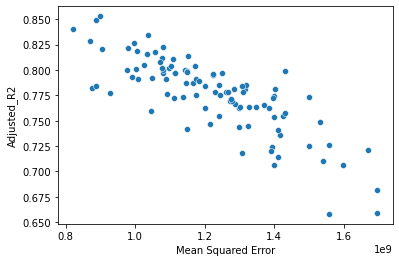

In [10]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

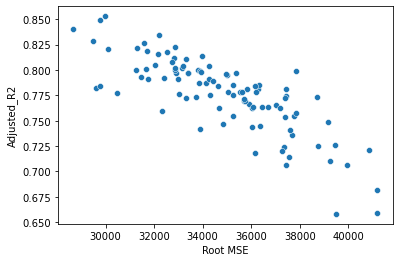

In [11]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

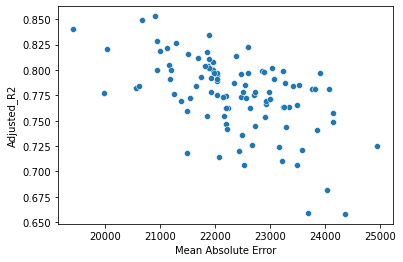

In [12]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

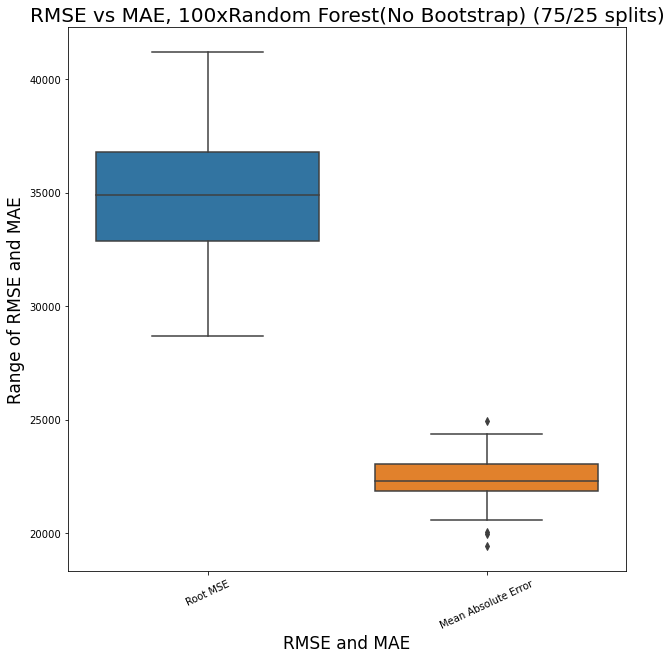

In [13]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xRandom Forest(No Bootstrap) (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

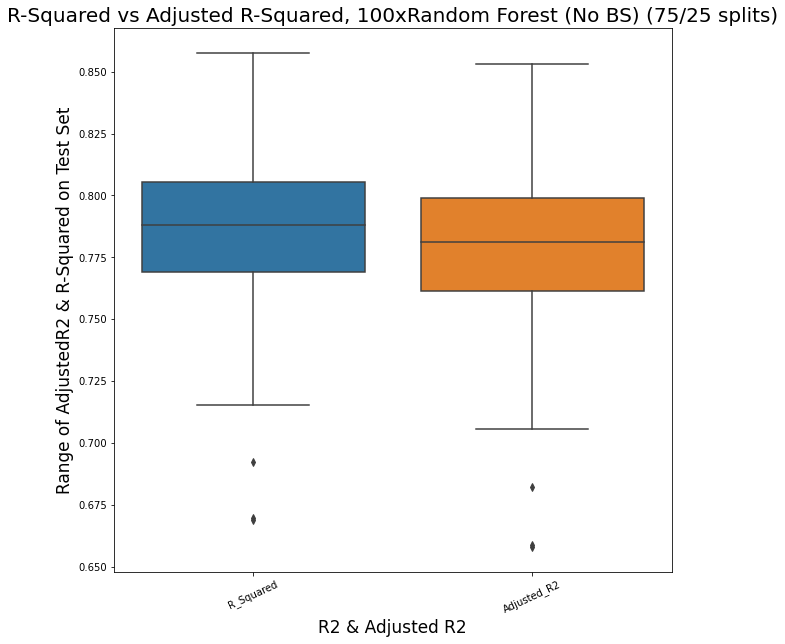

In [14]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRandom Forest (No BS) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [15]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,0.783191,0.776071,1.220473e+09,34825.173555,22354.591442
std,0.035804,0.036980,1.947882e+08,2785.244184,1023.617194
min,0.668988,0.658118,8.216419e+08,28664.297067,19421.755364
25%,0.769144,0.761563,1.081025e+09,32878.950343,21846.890729
50%,0.788227,0.781273,1.218809e+09,34911.398458,22293.868395
75%,0.805378,0.798987,1.352566e+09,36776.957326,23040.574322
max,0.857619,0.852943,1.696859e+09,41192.942683,24950.058915
